In [22]:
import numpy as np
import pandas as pd
import xgboost as xg
import seaborn as sb 
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [23]:
cd = pd.read_csv("car_data.csv")
cd

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [24]:
print("Check for any missing values: \n")
print(cd.isnull().sum())

Check for any missing values: 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [25]:
print("Check statistical values: \n")
cd.describe()

Check statistical values: 



,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [26]:
print("The 'Car Name' column was removed, since in this case it does not effect the price prediction results")
cd_up = cd.drop('Car_Name', axis=1)
cd_up

The 'Car Name' column was removed, since in this case it does not effect the price prediction results


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [27]:
cd_up['Current_Year'] = 2024
cd_up['No_of_Years'] = cd_up['Current_Year'] - cd_up['Year']
cd_up

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2024,8
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2024,9
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2024,15
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2024,7


In [28]:
cd_up.drop((['Year','Current_Year']), axis=1, inplace=True)
cd_up

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [29]:
#Turning categorical data into numerical data for Fuel Type, Seller Type, and Transmission
cd_con=pd.get_dummies(cd_up, drop_first=True)
cd_con

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,True,False,False,True
297,4.00,5.90,60000,0,9,False,True,False,True
298,3.35,11.00,87934,0,15,False,True,False,True
299,11.50,12.50,9000,0,7,True,False,False,True


In [30]:
#Finding the correlation between columns
cmap = cd_con.corr()

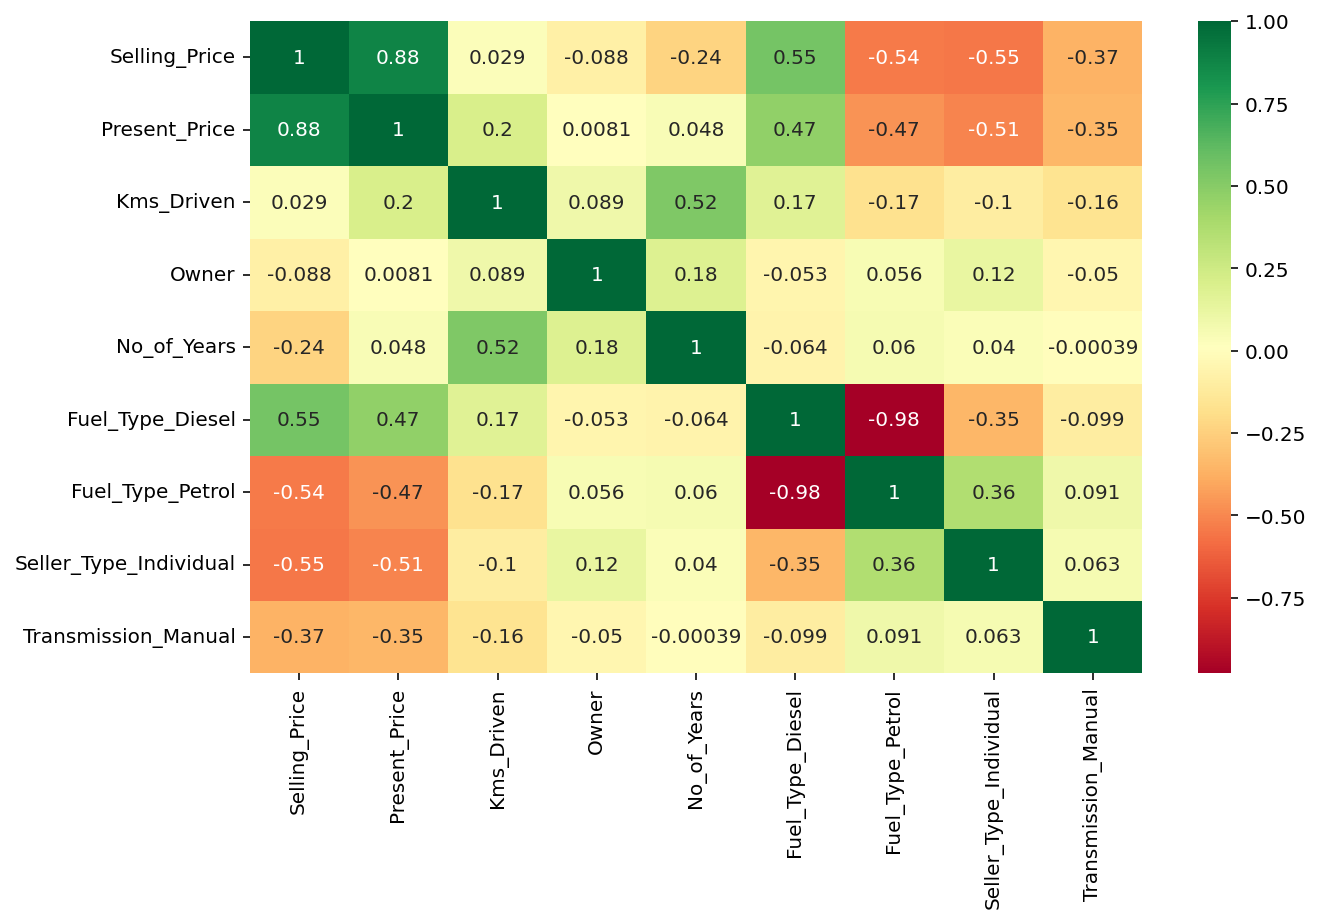

In [31]:
c_feat = cmap.index 
plt.figure(figsize=(10,6))
g=sb.heatmap(cd_con[c_feat].corr(),annot=True,cmap="RdYlGn")

In [32]:
#Splitting the Data into Training Set
# Independent variables
X = cd_con.drop("Selling_Price", axis = 1)

# Dependent variables
Y = cd_con['Selling_Price']

X.shape



(301, 8)

In [33]:
Y.shape

(301,)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [35]:
xgmodel = XGBRegressor()
xgmodel.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [36]:
y_pred_test = xgmodel.predict(X_test)

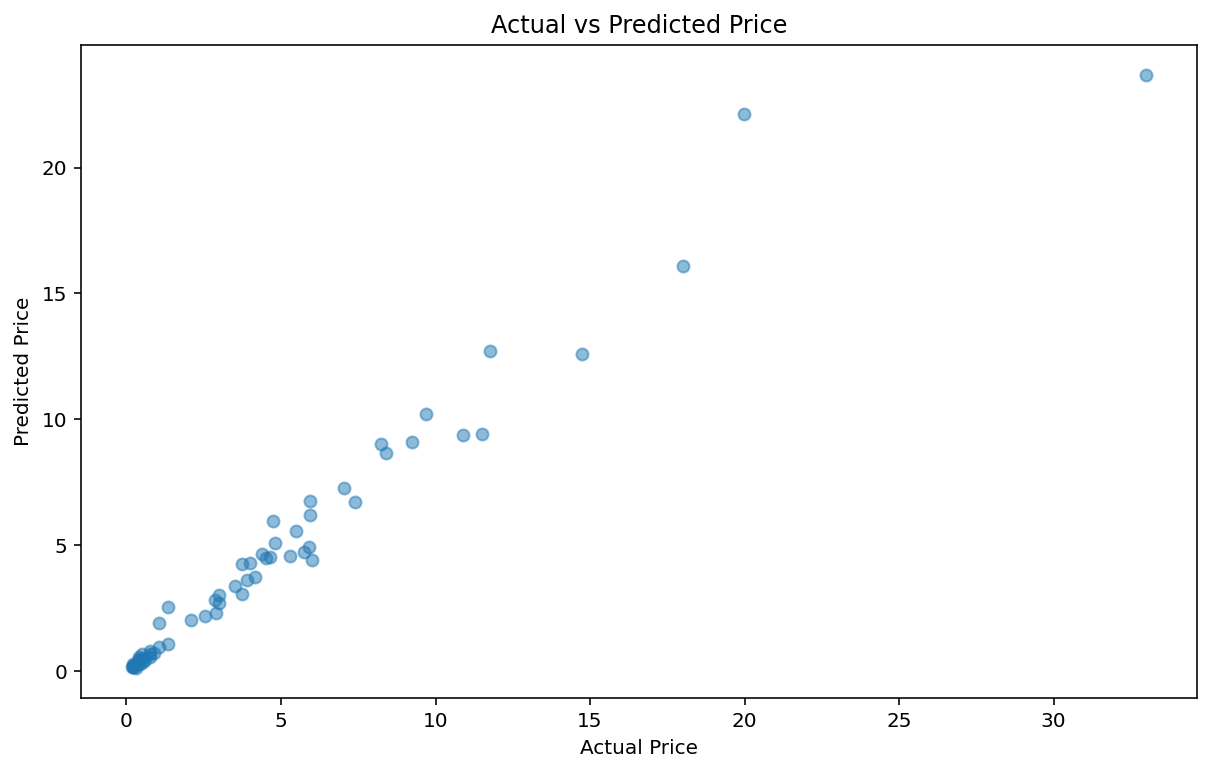

In [37]:
# This shows that there is a positive correlation between the actual price and predicted price
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

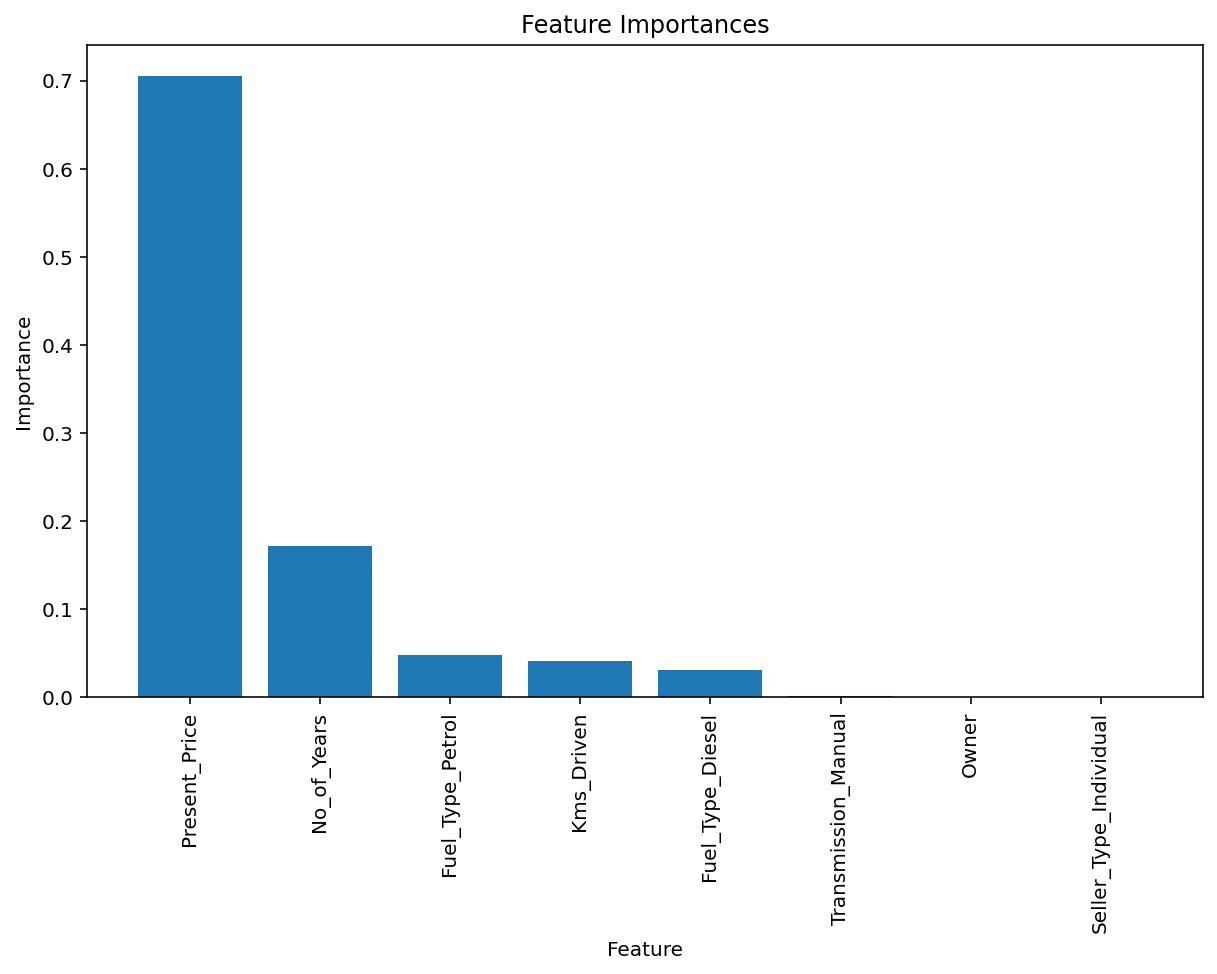

In [38]:
#This plot shows the importance of each feature in predicting the price

importances = xgmodel.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [43]:
# This shows the accuracy of the testing data applied to this model using Root Mean Squared Error
test_mse = mean_squared_error(Y_test, y_pred_test)
print(f'MSE: {test_mse}')
print(f'RMSE: {np.sqrt(test_mse)}')
print('Coefficient of Determination (R^2 Score):', r2_score(Y_test, y_pred_test))

MSE: 1.974431034313604
RMSE: 1.4051444887674733
Coefficient of Determination (R^2 Score): 0.9391867622835282


In [40]:
# Taking max and min values of training and test set to normalize RMSE scores
target_train_range = np.max(Y_train) - np.min(Y_train)
target_test_range = np.max(Y_test) - np.min(Y_test)

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgmodel, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')  
print("Cross-Validation Mean Squared Error:", -scores.mean())

Cross-Validation Mean Squared Error: 3.990003415694975


In [41]:
cd_con.head(30)

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True
5,9.25,9.83,2071,0,6,True,False,False,True
6,6.75,8.12,18796,0,9,False,True,False,True
7,6.50,8.61,33429,0,9,True,False,False,True
8,8.75,8.89,20273,0,8,True,False,False,True
9,7.45,8.92,42367,0,9,True,False,False,True


In [52]:
Test = cd_con[['Present_Price', 'Kms_Driven', 'Owner', 'No_of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']]


predictions = xgmodel.predict(Test)

for index, row in cd_con.head(30).iterrows():
    expected_value = row['Selling_Price']
    print("Predicted Price:", predictions[index])
    print(f"Expected Value: **{expected_value}** \n\n")

Predicted Price: 3.3561146
Expected Value: **3.35** 


Predicted Price: 5.969731
Expected Value: **4.75** 


Predicted Price: 7.2504754
Expected Value: **7.25** 


Predicted Price: 2.8458097
Expected Value: **2.85** 


Predicted Price: 4.6029572
Expected Value: **4.6** 


Predicted Price: 9.248288
Expected Value: **9.25** 


Predicted Price: 6.7367587
Expected Value: **6.75** 


Predicted Price: 6.50175
Expected Value: **6.5** 


Predicted Price: 8.738394
Expected Value: **8.75** 


Predicted Price: 7.4463468
Expected Value: **7.45** 


Predicted Price: 2.8206713
Expected Value: **2.85** 


Predicted Price: 6.867891
Expected Value: **6.85** 


Predicted Price: 7.495627
Expected Value: **7.5** 


Predicted Price: 6.0753245
Expected Value: **6.1** 


Predicted Price: 2.2484908
Expected Value: **2.25** 


Predicted Price: 7.753861
Expected Value: **7.75** 


Predicted Price: 7.250592
Expected Value: **7.25** 


Predicted Price: 7.753861
Expected Value: **7.75** 


Predicted Price: 3.25412